# 3. Simulations and Visualization 

Simulatng models after the construction of the model can be very simple; from the simulation, various methods to visualize said simulations can help determine exactly the changes in flux and matter within the system based on the perturbations one gives within the systems. More on this will be discussed throughout this notebook. 

To start off, we use a Simulation object and this requires MassModel which is usually defined at the start of each simulation along with the other criteria's for building the model. Optimization of the model is inherent balanced throught the simulations unless otherwise specified; we will cover the basics of setting up simulations and work on optimizations later on in the workbook. 

In [1]:
from mass import Simulation

In [2]:
from mass import MassModel, MassMetabolite, MassReaction, plot_simulation, plot_phase_portrait

Some useful packages to help visualize simulations can be loaded at this time, 

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

### 3.1 Simulate Models

For the sake of convinience, we will utilize our Complex Model which was used in the Building Models Example, 

$$\begin{equation} x_1 + x_2 \underset{v_{-1}}{\stackrel{v_1}{\rightleftharpoons}} x_3 \stackrel{v_2} \rightarrow x_4 \underset{v_{-3}}{\stackrel{v_3}{\rightleftharpoons}} x_5 \end{equation}$$ 

In [4]:
# Create MassModel
model = MassModel('Complex Model')
# Generate the MassMetabolites 
x1 = MassMetabolite("x1")
x2 = MassMetabolite("x2")
x3 = MassMetabolite("x3")
x4 = MassMetabolite("x4")
x5 = MassMetabolite("x5")
# Generate the MassReactions 
v1 = MassReaction("v1")
v2 = MassReaction("v2", reversible=False)
v3 = MassReaction("v3")
# Add metabolites to the reaction, add reaction to the model
v1.add_metabolites({x1: -1, x2: -1, x3: 1})
v2.add_metabolites({x3: -1, x4: 1})
v3.add_metabolites({x4: -1, x5: 1})
model.add_reactions([v1, v2, v3])
# Set parameters and initial conditions
v1.kf = 1
v1.Keq = 1
v2.kf = 1
v3.kf = 1
v3.Keq = 1
model.update_initial_conditions({x1: 1, x2: 1, x3: 0, x4: 0, x5:0 }, 
                                update_metabolites=True)

In [5]:
model

Name,Complex Model
Memory address,0x0124553748
Stoichiometric Matrix,5x3
Matrix Rank,3
Matrix Type,"dense, float64"
Number of Metabolites,5
Number of Reactions,3
Number of Initial Conditions,5
Number of Forward Rate Constants,3
Number of Equilibrium Constants,3
Number of Irreversible Reactions,1


Let's simulate this model, 

In [6]:
sim = Simulation(model)

**Simulation.simulate_model** method integrates the ordinary differential equations within the system given the time constraints are provided. The _output_ would be concentration and fluxes of the model system, 

In [7]:
t0= 0 
tf= 1e6
conc_sol, flux_sol = sim.simulate_model(model, time=(t0,tf), verbose = True)

*NOTE*: There is a reason we set verbose as true when simulating models as there can be many times when the model has inconsistent data which corresponds to the simulations itself. If a model is unable to be simulated, there is a prompt as a response displaying a warning which will then pull up a QC/QA report which _highlights the inconsistencies, missing values, and any other issues_ to help assist and diagnose the porblem within the model.

### 3.2 Inspection of Solutions

The default settings ensure that MassPy object Simulation uses scipy interpolating functions to construct corresponding flux and mass balances amongst the metabolites and the reactions given in order to derive concentrations and fluxes. **Simulation.simulate_model** returns two specified dictionary lists which are known as solution objects, 

The first Solution dictate MassMetabolite keys with their respective concentration solutions values,

In [8]:
conc_sol.solutions

{'x1': <scipy.interpolate.interpolate.interp1d at 0x1245bf688>,
 'x2': <scipy.interpolate.interpolate.interp1d at 0x1245c2098>,
 'x3': <scipy.interpolate.interpolate.interp1d at 0x1245c2548>,
 'x4': <scipy.interpolate.interpolate.interp1d at 0x1245c2688>,
 'x5': <scipy.interpolate.interpolate.interp1d at 0x1245c27c8>}

Similarily, the second Solution distates the MassReaction keys with their respective flux solution values, 

In [9]:
flux_sol.solutions

{'v1': <scipy.interpolate.interpolate.interp1d at 0x1245bf548>,
 'v2': <scipy.interpolate.interpolate.interp1d at 0x1245bc728>,
 'v3': <scipy.interpolate.interpolate.interp1d at 0x1245c2e08>}

### 3.3 Query Time Response

Interpolating functions comprise of functions respective of time; evaluating the function and the corresponding system at a specific timepoint can be accomplished through, 

In [10]:
time_points= 100
for metabolite, interpolating_function in conc_sol.items():
    print ("%s: %s" % (metabolite, interpolating_function(time_points)))
for reaction, interpolating_function in flux_sol.items():
    print ("%s: %s" % (reaction, interpolating_function(time_points)))
print()

x1: 0.02029941848338077
x2: 0.02029941848338077
x3: 0.00020813483186141662
x4: 0.48979879049147956
x5: 0.489693656193278
v1: 0.00020393155888925594
v2: 0.00020813483186141662
v3: 0.0001051342982015467



Instead of just values for one point, we can get points for multiple points of time

In [11]:
time_points= [0.001, 0.01, 0.1, 1, 10, 100, 1000];
for metabolite, interpolating_function in conc_sol.items():
    print ("%s: %s" % (metabolite, interpolating_function(time_points)))
for reaction, interpolating_function in flux_sol.items():
    print ("%s: %s" % (reaction, interpolating_function(time_points)))
print()

x1: [0.9990015  0.99014803 0.9132163  0.61047647 0.18422871 0.02029942
 0.00200763]
x2: [0.9990015  0.99014803 0.9132163  0.61047647 0.18422871 0.02029942
 0.00200763]
x3: [9.98003274e-04 9.80263113e-03 8.23893397e-02 2.11206344e-01
 1.85878805e-02 2.08134832e-04 2.01731092e-06]
x4: [4.98980085e-07 4.91773075e-05 4.25052336e-03 1.32388620e-01
 4.03704479e-01 4.89798790e-01 4.98995682e-01]
x5: [2.01410074e-10 1.63864187e-07 1.43832631e-04 4.59285663e-02
 3.93478935e-01 4.89693656e-01 4.98994672e-01]
v1: [9.97005989e-01 9.70590486e-01 7.51574653e-01 1.61475168e-01
 1.53523352e-02 2.03931559e-04 2.01326042e-06]
v2: [9.98003274e-04 9.80263113e-03 8.23893397e-02 2.11206344e-01
 1.85878805e-02 2.08134832e-04 2.01731092e-06]
v3: [4.98778675e-07 4.90134433e-05 4.10669073e-03 8.64600535e-02
 1.02255445e-02 1.05134298e-04 1.00966927e-06]



Concentrations at these specific time stamps can be presented much more cleanly in a panda frame: 

In [12]:
data = [interpolating_function(time_points) for interpolating_function in conc_sol.values()]
index_col = [metabolite for metabolite in conc_sol.keys()]
pd.DataFrame(data, index=index_col, columns=time_points)

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
x1,9.990015e-01,9.901480e-01,0.913216,0.610476,0.184229,0.020299,0.002008
x2,9.990015e-01,9.901480e-01,0.913216,0.610476,0.184229,0.020299,0.002008
x3,9.980033e-04,9.802631e-03,0.082389,0.211206,0.018588,0.000208,0.000002
x4,4.989801e-07,4.917731e-05,0.004251,0.132389,0.403704,0.489799,0.498996
x5,2.014101e-10,1.638642e-07,0.000144,0.045929,0.393479,0.489694,0.498995


The same goes for reactions:

In [13]:
data = [interpolating_function(time_points) for interpolating_function in flux_sol.values()]
index_col = [reaction for reaction in flux_sol.keys()]
pd.DataFrame(data, index=index_col, columns=time_points)

,0.001,0.01,0.1,1.0,10.0,100.0,1000.0
v1,9.970060e-01,0.970590,0.751575,0.161475,0.015352,0.000204,0.000002
v2,9.980033e-04,0.009803,0.082389,0.211206,0.018588,0.000208,0.000002
v3,4.987787e-07,0.000049,0.004107,0.086460,0.010226,0.000105,0.000001


### 3.4 Filtering Specific Species & Fluxes

Concentration and flux solutions are specialized dictionaries within MassPy and function similar to any other dictionary. Capturing solutions for concentrations or fluxes using MassMetabolite and MassReaction identifiers as keys works the same as any other dictionary:

In [14]:
print(x1.id, conc_sol[x1.id])

x1 <scipy.interpolate.interpolate.interp1d object at 0x1245bf688>


To iterate through multiple reactions, one can: 

In [15]:
for flux in [v1,v2]: 
    print(flux.id, flux_sol[flux.id])

v1 <scipy.interpolate.interpolate.interp1d object at 0x1245bf548>
v2 <scipy.interpolate.interpolate.interp1d object at 0x1245bc728>


### 3.5 Switching between numerical arrays and interpolating functions

If we want to work with original time plots instead of with ODE's to determine the corresponding solutions used by the ODE solver, we can do so by accessing the original time point values within the Solution Object and using these to interpolate the functions, 

In [16]:
time_points = conc_sol.t
#Function gets slice of all 1st 50 points
print(conc_sol["x1"](time_points[:50]))

[1.         0.999999   0.999998   0.99935003 0.99870332 0.99805786
 0.99436381 0.99137664 0.98841645 0.98548294 0.98257577 0.97683921
 0.97120433 0.9656687  0.96023001 0.95488598 0.93553741 0.91739526
 0.90035959 0.88434016 0.86925533 0.85503108 0.83374205 0.81426783
 0.7963935  0.77993319 0.76472564 0.75063056 0.73752555 0.72203462
 0.70779676 0.69464813 0.68244936 0.6710816  0.66044319 0.65044695
 0.63896779 0.62822378 0.61811734 0.6085667  0.59950321 0.59086897
 0.5799286  0.56957066 0.55971765 0.5503068  0.54128695 0.53261617
 0.52221091 0.51224292]


To convert an entire Solution object from interpolating functions to numerical assays or vice versa, we use the Solutions.interpolate setter method:

In [17]:
conc_sol.interpolate = False
conc_sol.solutions["x1"][:50]

array([1.        , 0.999999  , 0.999998  , 0.99935003, 0.99870332,
       0.99805786, 0.99436381, 0.99137664, 0.98841645, 0.98548294,
       0.98257577, 0.97683921, 0.97120433, 0.9656687 , 0.96023001,
       0.95488598, 0.93553741, 0.91739526, 0.90035959, 0.88434016,
       0.86925533, 0.85503108, 0.83374205, 0.81426783, 0.7963935 ,
       0.77993319, 0.76472564, 0.75063056, 0.73752555, 0.72203462,
       0.70779676, 0.69464813, 0.68244936, 0.6710816 , 0.66044319,
       0.65044695, 0.63896779, 0.62822378, 0.61811734, 0.6085667 ,
       0.59950321, 0.59086897, 0.5799286 , 0.56957066, 0.55971765,
       0.5503068 , 0.54128695, 0.53261617, 0.52221091, 0.51224292])

In [18]:
conc_sol.interpolate = True
conc_sol.solutions

{'x1': <scipy.interpolate.interpolate.interp1d at 0x1245c44a8>,
 'x2': <scipy.interpolate.interpolate.interp1d at 0x1245c1098>,
 'x3': <scipy.interpolate.interpolate.interp1d at 0x1245c1908>,
 'x4': <scipy.interpolate.interpolate.interp1d at 0x1245c4188>,
 'x5': <scipy.interpolate.interpolate.interp1d at 0x1245c19a8>}

##### Something here detailing what we are trying to accomplish with the differentiation of the interpolating methods and why setting arrays is useful... 

### 3.6 Graphic visualization of Models

Visualization of the solutions can be easily completed through MassPy after simulation of the model;

In [19]:
import matplotlib.pyplot as plt
from mass.core.visualization import (plot_phase_portrait, plot_simulation, plot_tiled_phase_portrait, get_defaults,
                                   set_defaults, make_display_data)

The matplotlib pthon package was imported above but it was done again here just to clarigy the package corresponds to the visualization; the documentation for visualiation class can be viewed to determine more details for plotting kwargs.

__3.6.1 Drawing Time Courses__

Plotting dynamic simulations can be very simple with the __visualization.plot_simulations__ command,

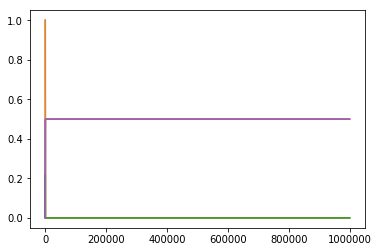

In [20]:
plot_simulation(conc_sol);

It is very apparent that this graph is useless in terms of determining the dynamic interactions between the metabolites within the reaction system. Furthermore, the time scale is much larger than what we can visualize and extract information from. To rectify this issue, we use __plot_function__ kwarg to change the scale such that we keep the y-axis as a linear scale and interpret the x axis through a lograthmic scale, 

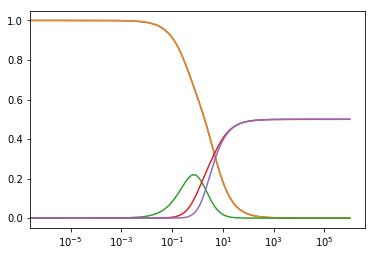

In [21]:
plot_simulation(conc_sol, plot_function = "semilogx")

Espiecially useful is the observable argument which specifies the particular solutions you want to view in your concentration profiles while filtering out other solutions. If we want to plot just x4 and x5 since they are so close, we can do,

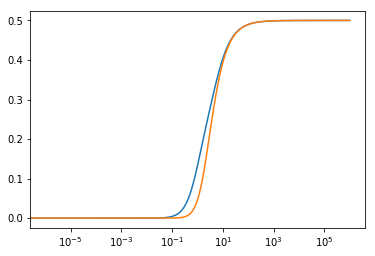

In [22]:
plot_simulation(conc_sol, observable=["x4", "x5"], plot_function = 'semilogx')

Furthermore, to analyze with more accurate information, it is necessary to add a title, axes labels and legends to the plot. Currently, the current default arguments can be viewed through __visualizations.get_defaults__ function and the syntax for each kwarg can be viwed through the __help__ function for *visualization.set_defaults*. View the previous notebooks to see a full detailed model on inspection of models. In order to do this, we can type: 

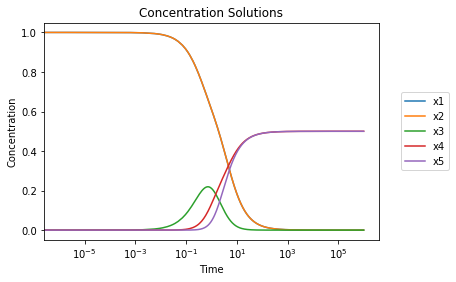

In [23]:
plot_simulation(conc_sol, legend = "right outside", plot_function="semilogx", xlabel = "Time", ylabel="Concentration",
               title = ("Concentration Solutions", {"size": "large"}))

__3.6.2 Phase Portraits__

Another way to display visualization of solutions is to plot one dynamic response of a metabolite against another metabolite; this can be acieved through the *visualization.plot_phase_portrait* method:

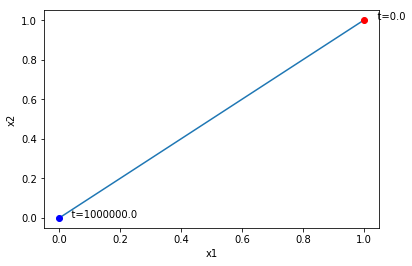

In [24]:
plot_phase_portrait(conc_sol, x="x1", y="x2", xlabel="x1", ylabel="x2")

*Note*: __time_poi__ can be used to highlight points of interest you want your specific plot to contain; this can be done in a number of ways, most commonly by either providing iterable time points as "points of interest" or using a dictionary with keys as the time points and values correspoinding to a specific color. In the following example, colors are used to discern each point so we can remove annotations for each point,

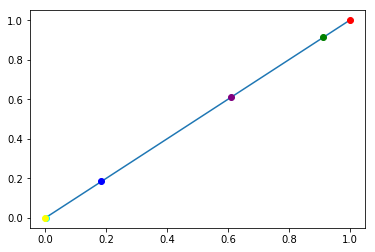

In [25]:
poi_dict = dict(zip([t0, 1e-1 , 1e0, 1e1, 1e3, tf], ["red", "green", "purple", "blue", "cyan", "yellow"]))
plot_phase_portrait(conc_sol, x="x1", y="x2", time_poi= poi_dict, poi_labels=False);

Multiple phase portraits can also be depicted with \\(x_1\\) simultaneously:  \\(x_1\\) vs \\(x_2\\), \\(x_1\\) vs \\(x_3\\), and \\(x_1\\) vs \\(x_4\\) can all be shown on the same phase portrait, 

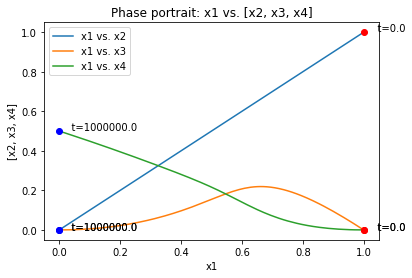

In [26]:
plot_phase_portrait(conc_sol, x=["x1"], y = ["x2", "x3", "x4"], legend ="best", xlabel = "x1", ylabel= "[x2, x3, x4]",
                    title = ("Phase portrait: x1 vs. [x2, x3, x4]", {"size":"large"}))

__3.6.3 Tiled Phase Portraits__

All pairwise phase portraits can be generated and viwed at once using the tiled phase portrait method: __visualization.plot_tiled_phase_portrait__

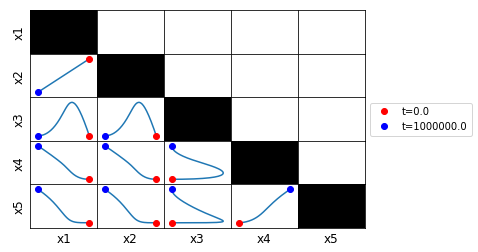

In [27]:
plot_tiled_phase_portrait(conc_sol)

This method is particularily useful for examining the dynamic behavior of metabolites for each pairwise metabolite concentrations over differing time scales in order to analyze their constraints and dependency for each of their respective fluxes. For example, from the overall behavior depicted above, using a fast timescale of (0,1), an intermediate scale from (3, 100) and a slow timescale of (300,1000) can be decomposed withinthe tiled phase portraits to analyze the solutions in depth, 

In [28]:
# observable = ["x1", "x2", "x3"]
# n_sols = len(observable)
# place = "upper"

# # Correlation values
# corr_a = []
# corr_b = [[1, 1]]
# corr_c = [[1, 1.02], [1, 0.51], [1, 0.5]]
# corr_d = [[1, 1.02], [1, 1.02], [1, 1.02]]

# # Format correlation data for tiled phase portraits
# data_a, data_b, data_c, data_d = [
#     make_display_data(n_sols, corr, "{0:.2f}\n{1:.2f}", empty_tiles=place)
#     for corr in [corr_a, corr_b, corr_c, corr_d]]

# fig, axes = plt.subplots(2, 2, figsize=(10, 10))
# times = [(0, 400000), (0, 1), (3, 100), (300, 10000)]
# titles = ["{0}:\nt0={1}; tf={2}".format(label, time[0], time[-1])
#           for label, time in zip(["(a)", "(b)", "(c)", "(d)"], times)]
# data_sets = [data_a, data_b, data_c, data_d]
# for i, ax in enumerate(axes.flatten()):
#     plot_tiled_phase_portrait(conc_sol, observable,
#                               time=times[i], ax=ax, 
#                               display_data=data_sets[i], 
#                               empty_tiles=place,
#                               fontsize="large",
#                               poi_labels=False, title=titles[i]);

### 3.7 Post - Process Solutions

#### 3.7.1 Analyzing Pool Behaviors

To analyze the behavior of pools, we can create __Simulation.make_pools__ methodology derived from strings in order to represent pool formulas. Different parameters can be incorporated to the pool formulation using dictionary input for __parameters__ argument. 

In [41]:
pools = ['x1*x2 - x3', 'x3 - x4', 'x1 + x2 + x3', 'x4 +x5'] #Not sure about pools here
pool_sol = sim.make_pools(pools)
pool_sol.solutions

{'p1': array([1.00000000e+00, 9.99997000e-01, 9.99994000e-01, 9.98050725e-01,
        9.96112482e-01, 9.94179256e-01, 9.83139239e-01, 9.74241993e-01,
        9.65451942e-01, 9.56767533e-01, 9.48187237e-01, 9.31333016e-01,
        9.14877588e-01, 8.98809670e-01, 8.83118352e-01, 8.67793097e-01,
        8.13093240e-01, 7.62959281e-01, 7.16944574e-01, 6.74653783e-01,
        6.35735906e-01, 5.99878468e-01, 5.47816142e-01, 5.01980525e-01,
        4.61520036e-01, 4.25715227e-01, 3.93955461e-01, 3.65720223e-01,
        3.40563977e-01, 3.12266537e-01, 2.87708265e-01, 2.66325556e-01,
        2.47647882e-01, 2.31280801e-01, 2.16892438e-01, 2.04202627e-01,
        1.90627805e-01, 1.78883981e-01, 1.68671977e-01, 1.59745254e-01,
        1.51900062e-01, 1.44967514e-01, 1.36896058e-01, 1.29932835e-01,
        1.23865078e-01, 1.18524851e-01, 1.13779139e-01, 1.09522272e-01,
        1.04759528e-01, 1.00502168e-01, 9.66524328e-02, 9.31355702e-02,
        8.98940807e-02, 8.68834895e-02, 8.33015271e-02, 7.

This tpye of function helps depict the entire solutions over different time ranges; *the interpolate function is not working for some reason; is this bc of the update?*

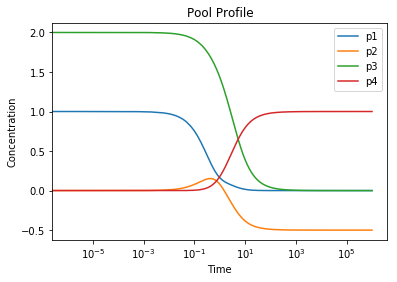

In [42]:
plot_simulation(pool_sol, plot_function= 'semilogx', xlabel='Time', ylabel='Concentration',
                title = ("Pool Profile",{"size":"large"}), legend = "best" )

#### 3.7.2 Computing Fluxes

Similar process can help derive behavior of the net flux through group of reactions utilizing __Simulation.make_net_fluxes__ method; both __Simulation.make_net_fluxes__ and __Simulation.make_pools__ rely on the __sympy.sympify__ function and can therefore use specific methodology within strings as well. Pull up sympy.sympify documentation through the help function for more help,

*Note:* Using dictionary inputs allows for pool and net flux IDs to be user-defined. 

In [43]:
net_fluxes = {"v_net_fluxes_1":'Abs(v1) + Abs(v2) + Abs(v3)'} #What is the different b/w apostrophe and quotes? 
net_flux_sol = sim.make_net_fluxes(net_fluxes)
net_flux_sol.solutions

{'v_net_fluxes_1': <scipy.interpolate.interpolate.interp1d at 0x1299fbef8>}

As aforementioned, this function solutions for individual fluxes over a time range of specified input and creates new scipy interpolating functions representing behavior of various flux combinations.

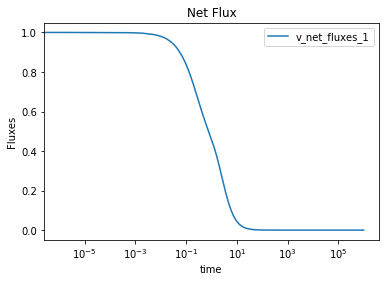

In [44]:
plot_simulation(net_flux_sol, legend="best", plot_function="semilogx", 
                xlabel="time", ylabel="Fluxes", 
                title=("Net Flux", {"size": "large"}));

#### 3.7.3 Plot Phase Portraits of Pools 

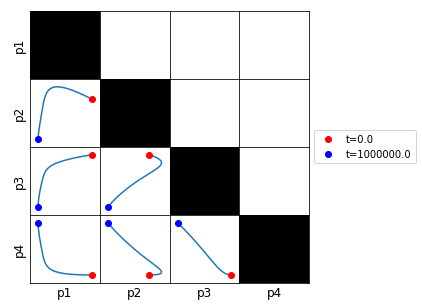

In [45]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
plot_tiled_phase_portrait(pool_sol, ax=ax)

From this depiction, we see how the metabolites are not dynamically independent of each other but are linearly dependent to some degree; more analysis of this can be visualized in other methods. 